<a href="https://colab.research.google.com/github/DittoOne/Capture-The-Scene/blob/main/capture_the_scene(Md_shahriar_Rahman).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Get Video
!wget -P video/ "https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4"

--2025-07-06 14:03:17--  https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4
Resolving ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)... 172.67.182.61, 104.21.75.216, 2606:4700:3037::ac43:b63d, ...
Connecting to ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)|172.67.182.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3700355 (3.5M) [video/mp4]
Saving to: ‘video/video.mp4’

video.mp4           100%[===================>]   3.53M  --.-KB/s    in 0.02s   

2025-07-06 14:03:17 (190 MB/s) - ‘video/video.mp4’ saved [3700355/3700355]



In [14]:
# @title Display Video

from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/video/video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Function to Implement

In [15]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def process_video_for_pano(video_path):
    """
    Process video to create panoramic shot and display it.

    Args:
        video_path (str): Path to input video file

    Returns:
        str: Path to saved panoramic image or None if failed
    """

    # Check if video exists
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        return None

    # Open video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Could not open video file!")
        return None

    # Get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Processing video with {total_frames} frames...")

    # Extract frames (every nth frame for efficiency)
    frame_interval = max(1, total_frames // 30)  # Extract ~30 frames max
    frames = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            # Resize frame for faster processing
            height, width = frame.shape[:2]
            if width > 800:
                new_width = 800
                new_height = int(height * (new_width / width))
                frame = cv2.resize(frame, (new_width, new_height))

            frames.append(frame)

        frame_count += 1

    cap.release()

    if len(frames) < 2:
        print("Not enough frames for panorama!")
        return None

    print(f"Extracted {len(frames)} frames")

    # Create panorama using OpenCV stitcher
    try:
        stitcher = cv2.Stitcher.create()
        status, panorama = stitcher.stitch(frames)

        if status != cv2.Stitcher_OK:
            print("Stitching failed, using fallback method...")
            # Fallback: simple horizontal concatenation
            target_height = 400
            resized_frames = []

            for frame in frames:
                h, w = frame.shape[:2]
                new_width = int(target_height * (w / h))
                resized_frame = cv2.resize(frame, (new_width, target_height))
                resized_frames.append(resized_frame)

            panorama = np.hstack(resized_frames)

    except Exception as e:
        print(f"Error creating panorama: {e}")
        return None

    # Create output path
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_dir = os.path.dirname(video_path) or '.'
    path_to_pano = os.path.join(output_dir, f"{video_name}_panorama.jpg")

    # Save panoramic image
    cv2.imwrite(path_to_pano, panorama)
    print(f"Panorama saved to: {path_to_pano}")

    # Display the panoramic image
    plt.figure(figsize=(15, 6))
    plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
    plt.title(f"Panoramic Shot - {video_name}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return path_to_pano

# Eval

Processing video with 255 frames...
Extracted 32 frames
Panorama saved to: /content/video/video_panorama.jpg


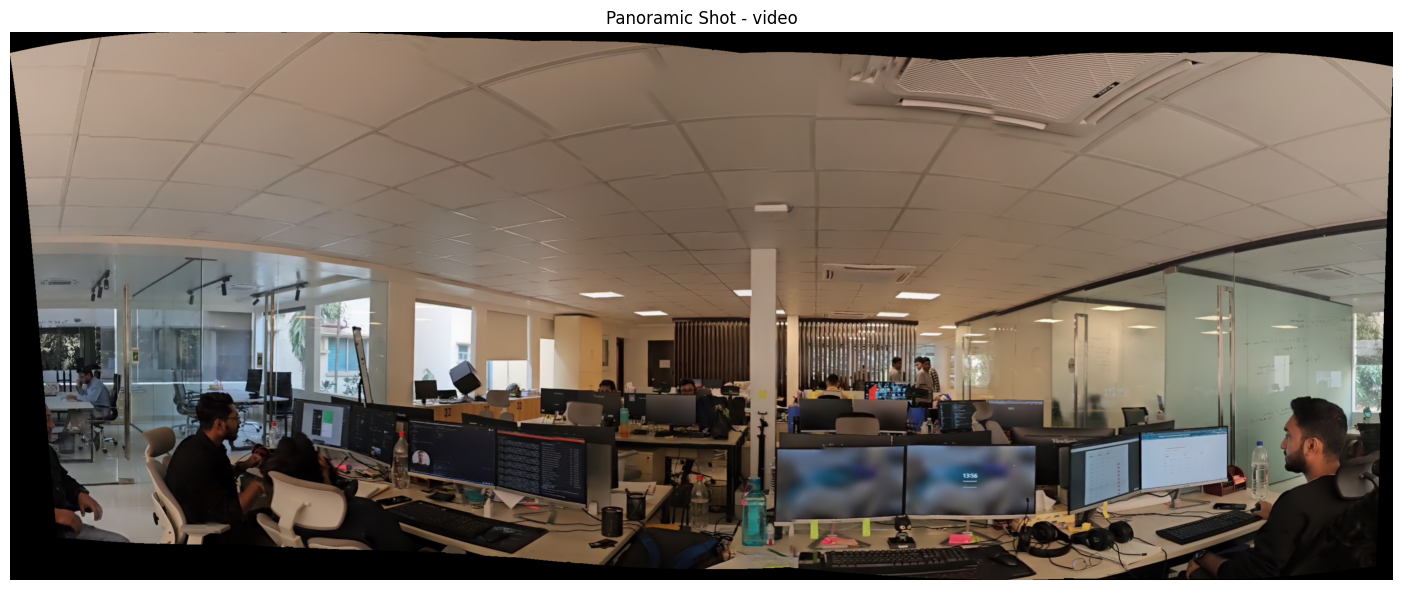

'/content/video/video_panorama.jpg'

In [16]:
# @title Get Pano

video_file_path = '/content/video/video.mp4'
process_video_for_pano(video_file_path)
